In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing Necessary Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler
from sklearn.metrics import (mean_absolute_error,
                            mean_squared_error, 
                            mean_absolute_percentage_error, 
                            r2_score
                            )
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_percentage_error,r2_score,mean_absolute_error

# Defining Column Names for Summary Output

In [3]:
summary_output_column_name = [
                     'algorithm'
                    ,'method'
                    ,'train_test'
                    ,'DataProcessing'
                    ,'mean_absolute_error'
                    ,'root_mean_squared_error'
                    ,'mean_absolute_percentage_error'
                    ,'r2_score'
                ]

# Initializing StanderScale and Specifying FB Prophet as the Algorithm 

In [4]:
scale = StandardScaler()
scale_name = 'StandardScaler'

# Loading Data: Tetuan City Power Consumption Dataset

In [5]:
df = pd.read_csv('C:\\Users\\MDTAW\\Downloads\\Final Year Project\\Dataset\\Tetuan City power consumption.csv')

# Renaming Columns and Converting Date Column to DateTime Format in DataFrame

In [6]:
df.rename(columns={
                   df.columns[0]:'ds',
                   df.columns[6]:'Zone1',
                   df.columns[7]:'Zone2',
                   df.columns[8]:'Zone3'
                  },inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Sorting DataFrame by Date Column

In [7]:
df.sort_values(by=['ds'],inplace=True)

# Converting DateTime to Hourly Precision and Updating the DataFrame

In [8]:
df['ds_new_format'] = df['ds'].dt.strftime('%Y-%m-%d %H')
df['ds_new_format'] = pd.to_datetime(df['ds_new_format'])
df['ds'] = df['ds_new_format'].copy()
df.drop(columns='ds_new_format',inplace=True)

# Grouping Data by DateTime and Aggregating with Mean and Max for Various Metrics

In [9]:
df = df.groupby('ds').agg({
        'Temperature': 'mean',
        'Humidity': 'mean',
        'Wind Speed': 'mean',
#         'general diffuse flows': 'mean',
#         'diffuse flows': 'mean',
        'Zone1': 'max',
        'Zone2': 'max',
        'Zone3': 'max'

    }).reset_index()

# Calculating Average Power Consumption Across Three Locations

In [10]:
df['aggregate'] = (df['Zone1'] + df['Zone2'] + df['Zone3']) / 3

In [11]:
df

,ds,Temperature,Humidity,Wind Speed,Zone1,Zone2,Zone3,aggregate
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,34055.69620,19375.07599,20240.96386,24557.245350
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,25998.98734,16993.31307,17945.06024,20312.453550
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,23003.54430,15169.60486,16117.59036,18096.913173
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,21107.84810,13535.56231,15140.24096,16594.550457
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,20530.63291,13032.21884,14585.06024,16049.303997
...,...,...,...,...,...,...,...,...
8731,2017-12-30 19:00:00,9.453333,62.406667,0.074667,37694.29658,32814.97392,17004.56182,29171.277440
8732,2017-12-30 20:00:00,9.041667,63.990000,0.080333,37195.43726,32373.12059,17137.09484,28901.884230
8733,2017-12-30 21:00:00,8.011667,69.675000,0.081500,36343.72624,31345.81160,16877.79112,28189.109653
8734,2017-12-30 22:00:00,7.598333,70.315000,0.081833,34920.15209,29445.84228,16053.78151,26806.591960


# Plotting 'Zone1, Zone2 , Zone3 and aggregate' Time Series Data with Matplotlib and Customizing the Plot

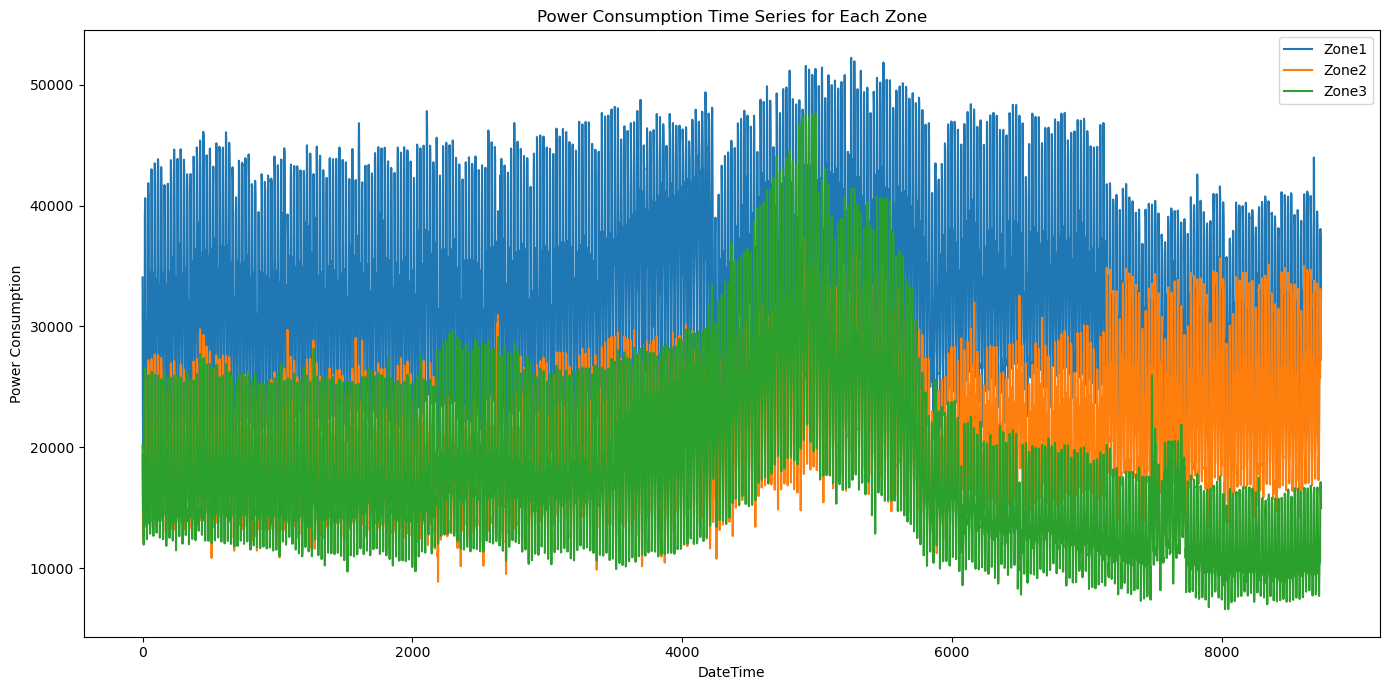

In [12]:
# Correcting the column names based on the initial data display
plt.figure(figsize=(14, 7))

# Adjusting column names to match the DataFrame exactly
zone_columns = ['Zone1', 'Zone2', 'Zone3']
for column in zone_columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Power Consumption Time Series for Each Zone')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

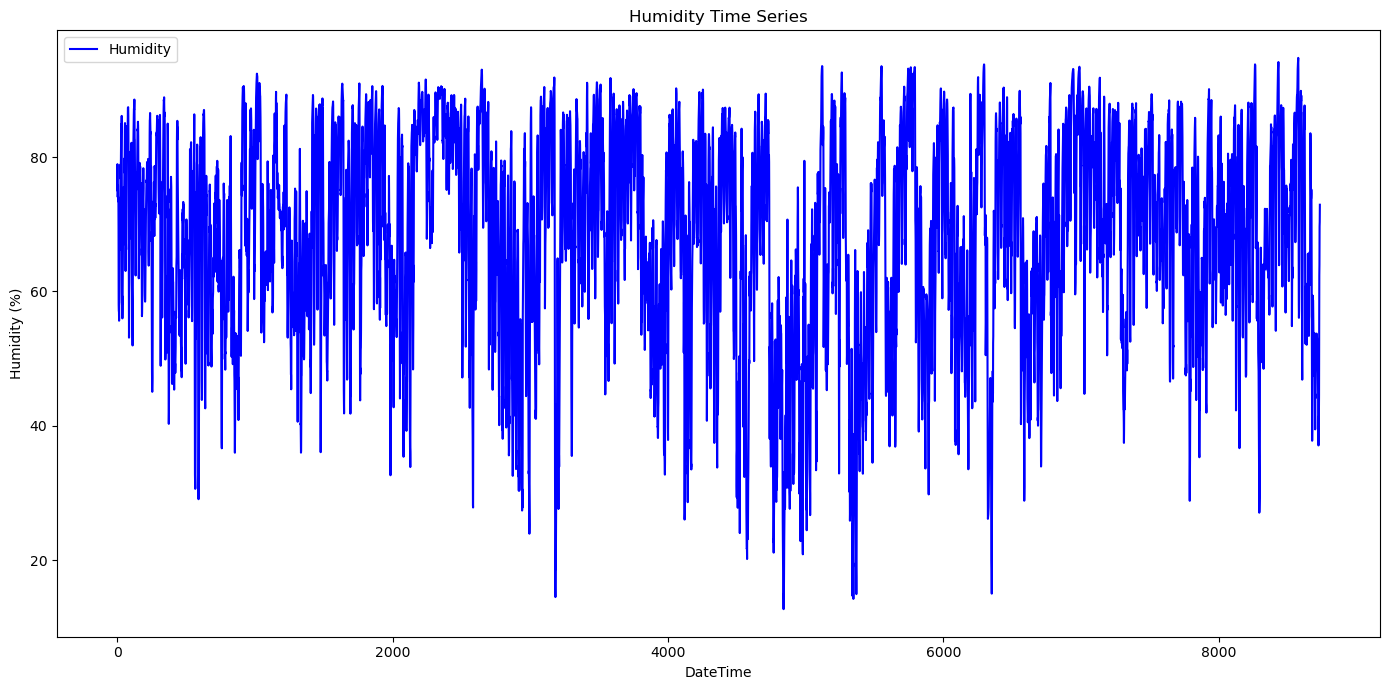

In [13]:
# Plotting humidity data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Humidity'], label='Humidity', color='blue')
plt.title('Humidity Time Series')
plt.xlabel('DateTime')
plt.ylabel('Humidity (%)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

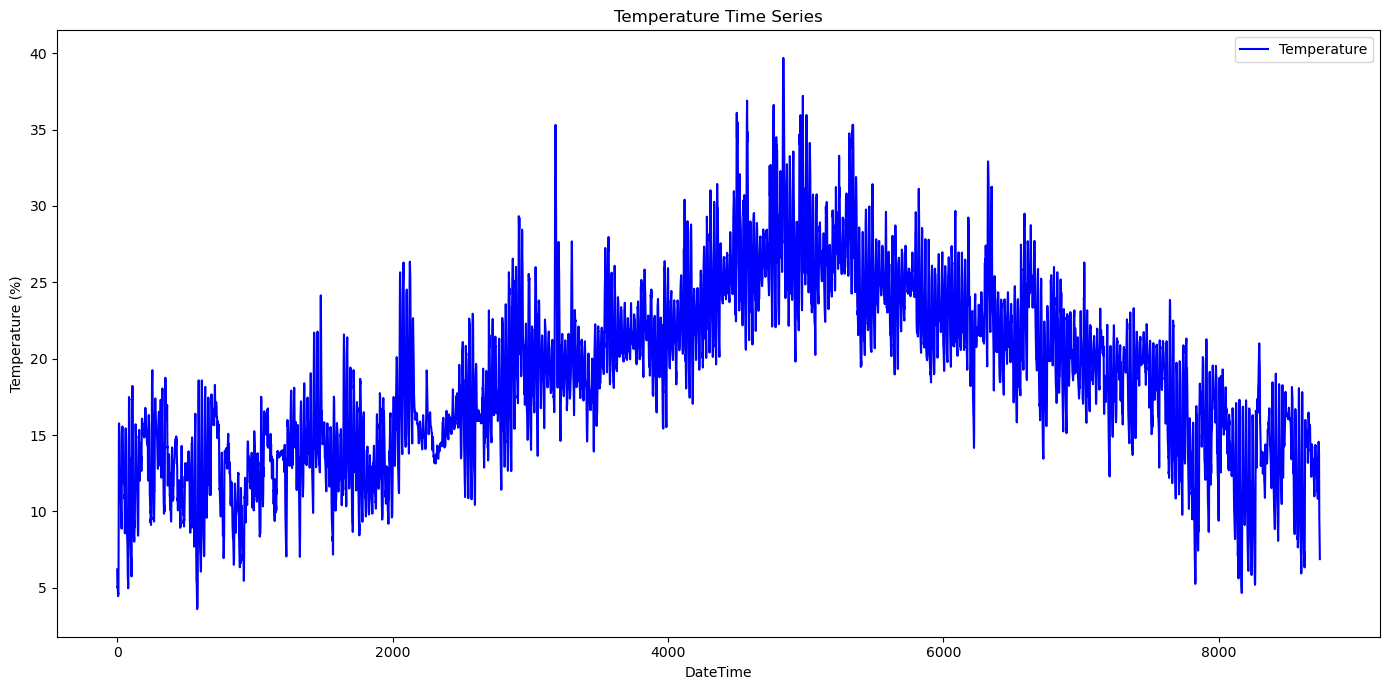

In [14]:
# Plotting Temperature data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Temperature'], label='Temperature', color='blue')
plt.title('Temperature Time Series')
plt.xlabel('DateTime')
plt.ylabel('Temperature (%)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

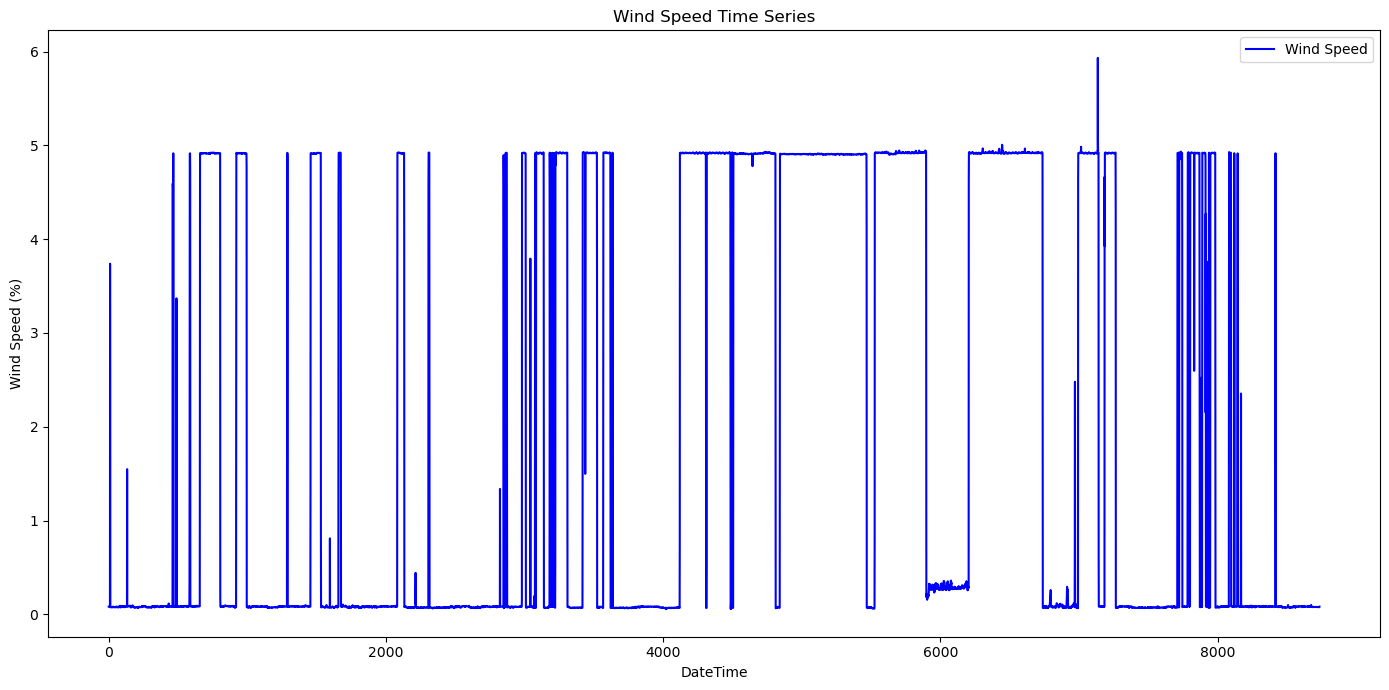

In [15]:
# Plotting Wind speed data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Wind Speed'], label='Wind Speed', color='blue')
plt.title('Wind Speed Time Series')
plt.xlabel('DateTime')
plt.ylabel('Wind Speed (%)')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

# Temperature vs Humidity

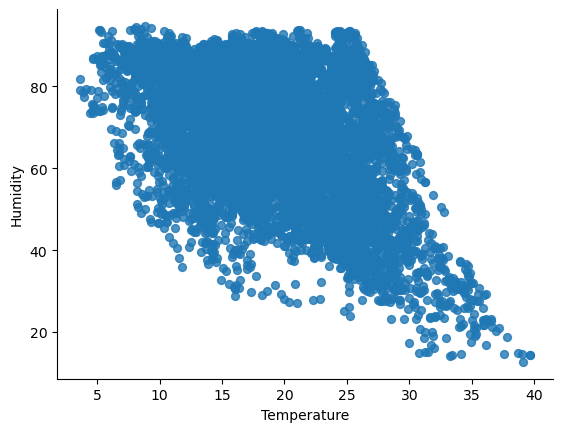

In [16]:
# @title Temperature vs Humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Calculating the Number of Missing Values in Each Column of the DataFrame


In [17]:
df.isnull().sum()

ds             0
Temperature    0
Humidity       0
Wind Speed     0
Zone1          0
Zone2          0
Zone3          0
aggregate      0
dtype: int64

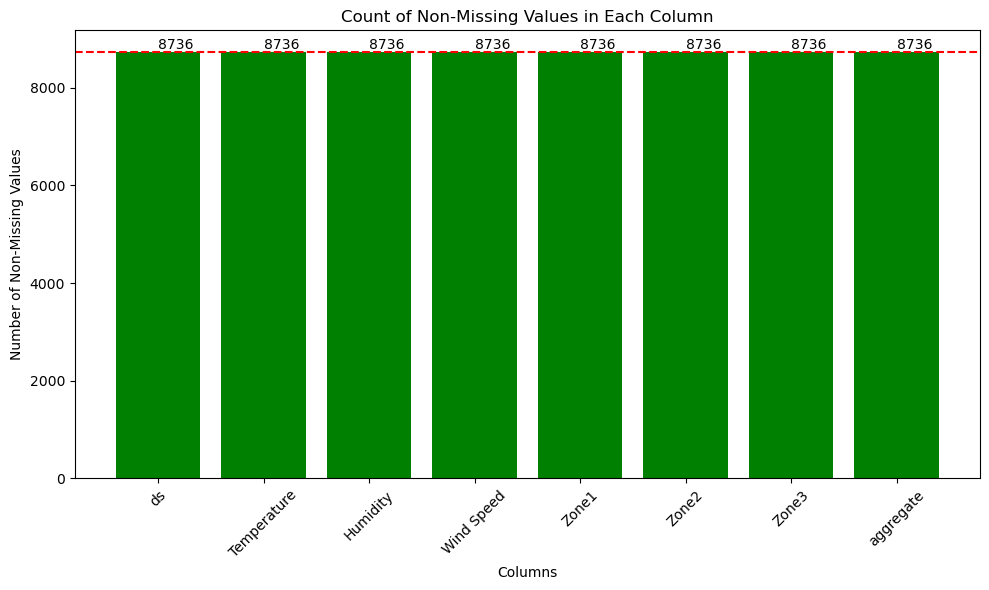

In [18]:
# Calculate the count of non-missing values for each column
non_missing_counts = df.notnull().sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(non_missing_counts.index, non_missing_counts.values, color='green')

# Add a line to indicate the total number of rows, which is the maximum number of non-missing values
plt.axhline(y=df.shape[0], color='r', linestyle='--')

# Adding the text for each bar to indicate the actual count of non-missing values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') # va: vertical alignment

plt.title('Count of Non-Missing Values in Each Column')
plt.ylabel('Number of Non-Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# Train, Test and Validation Data Sets Based on Percentages

In [19]:
# Define the percentage of the dataset to be used as the training set (75%)
train_size_percentage = 0.75
# Define the percentage of the dataset to reach when including both the training set and validation set (90%)
validation_size_percentage = 0.90

# Calculate the number of rows that make up the training set based on the percentage specified
train_size = int(df.shape[0] * train_size_percentage)
# Calculate the total number of rows that make up the training set and validation set together
validation_size = int(df.shape[0] * validation_size_percentage)


# Train, Test and  Validation visualization


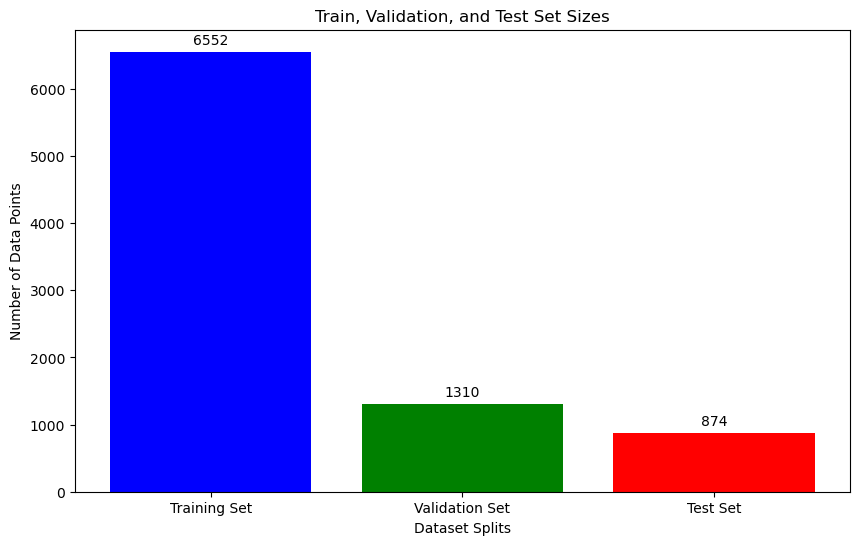

In [20]:
# Define sizes for each dataset split
# Assuming df is your DataFrame
df_size = df.shape[0]
train_size = int(df_size * train_size_percentage)
validation_size = int(df_size * validation_size_percentage)
test_size = df_size - validation_size

# For visualization, create a list of the sizes
sizes = [train_size, validation_size - train_size, test_size]
labels = ['Training Set', 'Validation Set', 'Test Set']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=['blue', 'green', 'red'])
plt.title('Train, Validation, and Test Set Sizes')
plt.xlabel('Dataset Splits')
plt.ylabel('Number of Data Points')
for i, v in enumerate(sizes):
    plt.text(i, v + max(sizes) * 0.01, str(v), ha='center', va='bottom')

plt.show()

# Function to Inverse Scale Predicted Values in DataFrame

In [21]:
# Define a function to reverse scale (normalize) the results in a DataFrame.
def get_invers_result(finalDf, col_size):
    # Iterate through each column in the DataFrame.
    for col_name in list(finalDf):
        # Skip the 'ds' column since we don't want to transform date values.
        if col_name != 'ds':
            # Duplicate the column values to match the expected input shape for the scaler's inverse_transform method.
            copied_value = np.repeat(np.array(finalDf[col_name]).reshape(-1, 1), col_size, axis=-1)
            # Apply the inverse transformation to scale back the data to its original scale.
            inversedValue = scale.inverse_transform(copied_value)[:, -1]
            # Update the DataFrame with the inverse transformed values.
            finalDf[col_name] = inversedValue
            
    # Return the DataFrame with scaled-back values.
    return finalDf


# Merging Forecast Data with Original Data Based on Dates

In [22]:
# Function to merge forecasted results with the original dataset based on the date column 'ds'.
def merge_forecast_original(forecast, df):
    # Select only relevant columns from the forecast DataFrame.
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    # Perform an inner join between the original df and forecast on the 'ds' column.
    finalDf = pd.merge(df, forecast, how='inner', left_on='ds', right_on='ds')
    # Keep only the columns 'ds', 'y' (actual values), and the forecast columns ('yhat', 'yhat_lower', 'yhat_upper').
    finalDf = finalDf[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']]
    # Return the merged DataFrame.
    return finalDf


# Removing Specified Elements from a List

In [23]:
# Function to remove multiple elements from a list.
def remove_multiple_list(list_val, remove_elem):
    # Ensure the input is treated as a list in case it's not.
    list_val = list(list_val)
    # Iterate over elements to be removed.
    for elem in remove_elem:
        # Remove the current element from list_val.
        list_val.remove(elem)
    # Return the modified list after removing specified elements.
    return list_val


# Data Preprocessing: Scaling Features and Reintegrating Date Column


In [24]:
# This function preprocesses the input DataFrame by:
# - Separating the date column from the feature columns.
# - Applying scaling to the feature columns using a predefined scaler (e.g., MinMaxScaler, StandardScaler).
# - Reintegrating the date column with the scaled features into a single DataFrame.
# - The function returns the processed DataFrame, ready for further analysis or model training.

def make_data_processing(df):
    
    
    colname = list(df)
    date_df = df[colname[0]]
    without_date_df = df[colname[1:]]
    
    scale.fit(without_date_df)
    processing_data = pd.DataFrame(scale.transform(without_date_df), columns=colname[1:])

    date_df.reset_index(drop=True, inplace=True)
    processing_data.reset_index(drop=True, inplace=True)

    df = pd.concat([date_df, processing_data], axis=1)
    del processing_data
    return df

# Displaying Confusion Matrix Metrics for Model Evaluation

In [25]:
# Function to calculate and print evaluation metrics for model performance.
def get_confusion_metrix(df, result_type):
    # Print the type of results being analyzed (e.g., train, validation, test).
    print(result_type)
    # Print a separator for clarity.
    print('.........................................')
    
    # Calculate Mean Absolute Error between actual and predicted values.
    mae = mean_absolute_error(df['y'], df['yhat'])
    # Calculate Mean Squared Error.
    mse = mean_squared_error(df['y'], df['yhat'])
    # Calculate Root Mean Squared Error from MSE.
    rmse = np.sqrt(mse)
    # Calculate Mean Absolute Percentage Error, convert to percentage, and round.
    mape = round(mean_absolute_percentage_error(df['y'], df['yhat']) * 100, 4)
    # Calculate R2 Score, convert to percentage, and round.
    r2_score_ = round(r2_score(df['y'], df['yhat']) * 100, 4)
    
    # Print the calculated metrics.
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R2 Score (R2):", r2_score_)


# Splitting DataFrame into Train, Validation, and Test Sets

In [26]:
# Function to split a DataFrame into training, validation, and test sets based on predefined sizes.
def train_test_validation(df):
    # Slice the DataFrame to create the training set up to the defined train size.
    traindf = df.loc[:train_size - 1]
    # Slice the DataFrame from the end of the training set to the defined validation size for the validation set.
    validationdf = df.loc[train_size:validation_size - 1]
    # Slice the DataFrame from the end of the validation set onwards for the test set.
    testdf = df.loc[validation_size:]
    
    # Return the three subsets.
    return traindf, validationdf, testdf

# Generating Future Validation Predictions Using Model and Target

In [27]:
# Function to generate future validation predictions using a model.
def getValidation_for_future(df, model, target):
    # Reset DataFrame index to ensure consistency.
    df.reset_index(drop=True, inplace=True)
    # Prepare a list of column names, excluding the last one (presumably the target column).
    initial_list_column = list(df)[:-1]
    # Initialize a list to store prediction results.
    Alldf = []
    # Iterate over unique dates in the 'ds' column.
    for ds in df['ds'].unique():
        row_res = []  # Initialize a list to store row results including features and target.
        
        # Extract feature values for the current date.
        Temperature = df[df['ds'] == pd.to_datetime(ds)]['Temperature'].values[0]
        Humidity = df[df['ds'] == pd.to_datetime(ds)]['Humidity'].values[0]
        Wind_Speed = df[df['ds'] == pd.to_datetime(ds)]['Wind Speed'].values[0]
        
        # Append features and target value to row_res.
        row_res.append(ds)
        row_res.append(Temperature)
        row_res.append(Humidity)
        row_res.append(Wind_Speed)
        row_res.append(target)
        # Convert row results to a DataFrame for prediction.
        row_res_df = pd.DataFrame([row_res], columns=initial_list_column)
        
        # Predict future values using the model.
        forecast_future = model.predict(row_res_df)
        # Select relevant forecast output.
        forecast_future = forecast_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        # Update target with the predicted value for the next iteration.
        target = forecast_future['yhat'].values[0]
        
        # Append the forecast DataFrame to the list.
        Alldf.append(forecast_future)
        
    # Concatenate all forecast DataFrames into a final output DataFrame.
    Final_future_output = pd.concat(Alldf, ignore_index=True)
    
    # Return the DataFrame containing all future predictions.
    return Final_future_output


In [28]:
df_hold = df.copy()

In [29]:
df_hold

,ds,Temperature,Humidity,Wind Speed,Zone1,Zone2,Zone3,aggregate
0,2017-01-01 00:00:00,6.196833,75.066667,0.081833,34055.69620,19375.07599,20240.96386,24557.245350
1,2017-01-01 01:00:00,5.548833,77.583333,0.082000,25998.98734,16993.31307,17945.06024,20312.453550
2,2017-01-01 02:00:00,5.054333,78.933333,0.082333,23003.54430,15169.60486,16117.59036,18096.913173
3,2017-01-01 03:00:00,5.004333,77.083333,0.082833,21107.84810,13535.56231,15140.24096,16594.550457
4,2017-01-01 04:00:00,5.097667,74.050000,0.082333,20530.63291,13032.21884,14585.06024,16049.303997
...,...,...,...,...,...,...,...,...
8731,2017-12-30 19:00:00,9.453333,62.406667,0.074667,37694.29658,32814.97392,17004.56182,29171.277440
8732,2017-12-30 20:00:00,9.041667,63.990000,0.080333,37195.43726,32373.12059,17137.09484,28901.884230
8733,2017-12-30 21:00:00,8.011667,69.675000,0.081500,36343.72624,31345.81160,16877.79112,28189.109653
8734,2017-12-30 22:00:00,7.598333,70.315000,0.081833,34920.15209,29445.84228,16053.78151,26806.591960


# Time Series Forecasting with FB Prophet for Multiple Targets Including Preprocessing and Evaluation


In [30]:
AllResultDf = []

for target_ in ['Zone1', 'Zone2', 'Zone3', 'aggregate']: #
    print(target_)
    print('......................................')
    
    feature_ = ['ds', 'Temperature', 'Humidity', 'Wind Speed'] #, 'general diffuse flows', 'diffuse flows'
    df = df[feature_ + [target_]]
    df['y'] = df[target_].shift(-1).copy()
    df.dropna(inplace=True)
    df = make_data_processing(df)
    
    traindf, validationdf, testdf = train_test_validation(df)

    print(traindf.shape)
    print(validationdf.shape)
    print(testdf.shape)
    
    originaldfCol = list(df)
    model_column = remove_multiple_list(originaldfCol, ['ds', 'y'])
    predict_column = remove_multiple_list(originaldfCol, ['y'])
    
    my_model = Prophet(growth='linear', interval_width=0.95)
    for colname in model_column:
        my_model.add_regressor(colname, standardize=False)
    
    my_model.fit(traindf)
    
    train_val = pd.concat([traindf,validationdf], ignore_index=True)
    
    predictdf = train_val[predict_column]
    forecast = my_model.predict(predictdf)
    finalDf = merge_forecast_original(forecast,train_val)
    
    finalDf = get_invers_result(finalDf,df.shape[1] - 1)

    traindf_result = finalDf.loc[:traindf.shape[0] - 1]
    traindf_result['method'] = target_
    traindf_result['train_test'] = 'train'
    traindf_result['algorithm'] = 'fbprophet'
    AllResultDf.append(traindf_result)
    
    validationdf_result = finalDf.loc[traindf.shape[0]:]
    validationdf_result['method'] = target_
    validationdf_result['train_test'] = 'validation'
    validationdf_result['algorithm'] = 'fbprophet'
    AllResultDf.append(validationdf_result)
    
    get_confusion_metrix(traindf_result,'train_Result')
    get_confusion_metrix(validationdf_result,'validation_Result')
    
    ################################################
    
    actual_model = Prophet(growth='linear', interval_width=0.95)
    for colname in model_column:
        actual_model.add_regressor(colname, standardize=False)
    
    actual_model.fit(train_val)
    target__ = train_val['y'].tail(1).values[0]
    
    future_df = getValidation_for_future(testdf,actual_model,target__)
    
    testdf_result = pd.merge(left=future_df,right=testdf,how='inner',on='ds')[['ds', 'y','yhat', 'yhat_lower', 'yhat_upper']]
    testdf_result = get_invers_result(testdf_result,df.shape[1] - 1)
    
    testdf_result['method'] = target_
    testdf_result['train_test'] = 'test'
    testdf_result['algorithm'] = 'fbprophet'
    AllResultDf.append(testdf_result)
    
    
    get_confusion_metrix(testdf_result,'test_Result')
    ################################################
    
    df = df_hold.copy()
    print('...................................................')
    
    
    
    

Zone1
......................................
(6552, 6)
(1310, 6)
(873, 6)


19:08:10 - cmdstanpy - INFO - Chain [1] start processing
19:08:11 - cmdstanpy - INFO - Chain [1] done processing


train_Result
.........................................
Mean Absolute Error (MAE): 1238.2824309624211
Root Mean Squared Error (RMSE): 1750.7002834576226
Mean Absolute Percentage Error (MAPE): 3.7281
R2 Score (R2): 94.236
validation_Result
.........................................
Mean Absolute Error (MAE): 1216.6698226475942
Root Mean Squared Error (RMSE): 1850.5673401215452
Mean Absolute Percentage Error (MAPE): 3.6619
R2 Score (R2): 92.2417


19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:13 - cmdstanpy - INFO - Chain [1] done processing


test_Result
.........................................
Mean Absolute Error (MAE): 2289.81550258742
Root Mean Squared Error (RMSE): 3021.5561729893425
Mean Absolute Percentage Error (MAPE): 7.6789
R2 Score (R2): 76.5832
...................................................
Zone2
......................................
(6552, 6)
(1310, 6)
(873, 6)


19:08:36 - cmdstanpy - INFO - Chain [1] start processing
19:08:36 - cmdstanpy - INFO - Chain [1] done processing


train_Result
.........................................
Mean Absolute Error (MAE): 827.1064036127441
Root Mean Squared Error (RMSE): 1157.6180773145932
Mean Absolute Percentage Error (MAPE): 4.0942
R2 Score (R2): 94.7623
validation_Result
.........................................
Mean Absolute Error (MAE): 1330.5582915542373
Root Mean Squared Error (RMSE): 1911.9519146692996
Mean Absolute Percentage Error (MAPE): 5.8983
R2 Score (R2): 85.9012


19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:39 - cmdstanpy - INFO - Chain [1] done processing


test_Result
.........................................
Mean Absolute Error (MAE): 2041.8695499058922
Root Mean Squared Error (RMSE): 2572.7237113980054
Mean Absolute Percentage Error (MAPE): 9.2745
R2 Score (R2): 79.9815
...................................................
Zone3
......................................
(6552, 6)
(1310, 6)
(873, 6)


19:09:01 - cmdstanpy - INFO - Chain [1] start processing
19:09:01 - cmdstanpy - INFO - Chain [1] done processing


train_Result
.........................................
Mean Absolute Error (MAE): 981.1537158003848
Root Mean Squared Error (RMSE): 1398.1369591071052
Mean Absolute Percentage Error (MAPE): 5.0781
R2 Score (R2): 95.505
validation_Result
.........................................
Mean Absolute Error (MAE): 2686.1107756341435
Root Mean Squared Error (RMSE): 3155.0355614470436
Mean Absolute Percentage Error (MAPE): 21.0233
R2 Score (R2): 10.667


19:09:03 - cmdstanpy - INFO - Chain [1] start processing
19:09:04 - cmdstanpy - INFO - Chain [1] done processing


test_Result
.........................................
Mean Absolute Error (MAE): 2162.1067485752546
Root Mean Squared Error (RMSE): 2589.2324375681287
Mean Absolute Percentage Error (MAPE): 18.1874
R2 Score (R2): 19.7955
...................................................
aggregate
......................................
(6552, 6)
(1310, 6)
(873, 6)


19:09:27 - cmdstanpy - INFO - Chain [1] start processing
19:09:28 - cmdstanpy - INFO - Chain [1] done processing


train_Result
.........................................
Mean Absolute Error (MAE): 939.7289418314085
Root Mean Squared Error (RMSE): 1336.328675058899
Mean Absolute Percentage Error (MAPE): 3.8418
R2 Score (R2): 94.9781
validation_Result
.........................................
Mean Absolute Error (MAE): 1720.1323354373146
Root Mean Squared Error (RMSE): 2195.531588134361
Mean Absolute Percentage Error (MAPE): 7.9316
R2 Score (R2): 77.5887


19:09:30 - cmdstanpy - INFO - Chain [1] start processing
19:09:31 - cmdstanpy - INFO - Chain [1] done processing


test_Result
.........................................
Mean Absolute Error (MAE): 1283.5740804838026
Root Mean Squared Error (RMSE): 1746.006392227716
Mean Absolute Percentage Error (MAPE): 5.8347
R2 Score (R2): 86.8727
...................................................


In [31]:
FullFinalResult = pd.concat(AllResultDf,ignore_index=True)

# Assigning the Name of the Data Scaling Method to the 'DataProcessing' Column in the Results DataFrame


In [32]:
FullFinalResult['DataProcessing'] = scale_name

# Retrieving Unique Values from the 'train_test' Column of the FullFinalResult DataFrame


In [33]:
FullFinalResult['train_test'].unique()

array(['train', 'validation', 'test'], dtype=object)

# Aggregating Performance Metrics by Algorithm, Method, Data Split, and Data Processing Technique


In [34]:
# This code iterates through each unique combination of algorithm, method, data split (train/test), and data processing technique in the FullFinalResult DataFrame. For each combination, it:
# - Filters the DataFrame to match the current combination.
# - Calculates mean absolute error (MAE), root mean squared error (RMSE), mean absolute percentage error (MAPE), and R2 score for the filtered data.
# - Rounds each metric for readability.
# - Appends the algorithm, method, data split, data processing technique, and the calculated metrics as a new row in a results list.
# - Prints each row of results for inspection.
# This aggregation provides a detailed overview of model performance across different configurations and preprocessing techniques.



result = []
for algorithm_ in FullFinalResult['algorithm'].unique():
    for method_ in FullFinalResult['method'].unique():
        for train_test_ in FullFinalResult['train_test'].unique():
            for DataProcessing_ in FullFinalResult['DataProcessing'].unique():

                result_row = []

                df = FullFinalResult[(FullFinalResult['algorithm']==algorithm_) & 
                                     (FullFinalResult['method']==method_) & 
                                     (FullFinalResult['train_test']==train_test_) &
                                     (FullFinalResult['DataProcessing']==DataProcessing_)
                                    ]


                mean_absolute_error_ = round(mean_absolute_error(df['y'], df['yhat']), 4)
                mean_squared_error_ = round(mean_squared_error(df['y'], df['yhat'], squared=False), 4)
                mean_absolute_percentage_error_ = round(mean_absolute_percentage_error(df['y'], df['yhat']) * 100, 4)
                r2_score_ = round(r2_score(df['y'], df['yhat']) * 100, 4)

                result_row.append(algorithm_)
                result_row.append(method_)
                result_row.append(train_test_)
                result_row.append(DataProcessing_)
                result_row.append(mean_absolute_error_)
                result_row.append(mean_squared_error_)
                result_row.append(mean_absolute_percentage_error_)
                result_row.append(r2_score_)

                print(result_row)
                result.append(result_row)

['fbprophet', 'Zone1', 'train', 'StandardScaler', 1238.2824, 1750.7003, 3.7281, 94.236]
['fbprophet', 'Zone1', 'validation', 'StandardScaler', 1216.6698, 1850.5673, 3.6619, 92.2417]
['fbprophet', 'Zone1', 'test', 'StandardScaler', 2289.8155, 3021.5562, 7.6789, 76.5832]
['fbprophet', 'Zone2', 'train', 'StandardScaler', 827.1064, 1157.6181, 4.0942, 94.7623]
['fbprophet', 'Zone2', 'validation', 'StandardScaler', 1330.5583, 1911.9519, 5.8983, 85.9012]
['fbprophet', 'Zone2', 'test', 'StandardScaler', 2041.8695, 2572.7237, 9.2745, 79.9815]
['fbprophet', 'Zone3', 'train', 'StandardScaler', 981.1537, 1398.137, 5.0781, 95.505]
['fbprophet', 'Zone3', 'validation', 'StandardScaler', 2686.1108, 3155.0356, 21.0233, 10.667]
['fbprophet', 'Zone3', 'test', 'StandardScaler', 2162.1067, 2589.2324, 18.1874, 19.7955]
['fbprophet', 'aggregate', 'train', 'StandardScaler', 939.7289, 1336.3287, 3.8418, 94.9781]
['fbprophet', 'aggregate', 'validation', 'StandardScaler', 1720.1323, 2195.5316, 7.9316, 77.5887]
[

In [35]:
FinalOutput_summary_result = pd.DataFrame(result,columns=summary_output_column_name)

In [36]:
FinalOutput_summary_result

,algorithm,method,train_test,DataProcessing,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error,r2_score
0,fbprophet,Zone1,train,StandardScaler,1238.2824,1750.7003,3.7281,94.2360
1,fbprophet,Zone1,validation,StandardScaler,1216.6698,1850.5673,3.6619,92.2417
2,fbprophet,Zone1,test,StandardScaler,2289.8155,3021.5562,7.6789,76.5832
3,fbprophet,Zone2,train,StandardScaler,827.1064,1157.6181,4.0942,94.7623
4,fbprophet,Zone2,validation,StandardScaler,1330.5583,1911.9519,5.8983,85.9012
5,fbprophet,Zone2,test,StandardScaler,2041.8695,2572.7237,9.2745,79.9815
6,fbprophet,Zone3,train,StandardScaler,981.1537,1398.1370,5.0781,95.5050
7,fbprophet,Zone3,validation,StandardScaler,2686.1108,3155.0356,21.0233,10.6670
8,fbprophet,Zone3,test,StandardScaler,2162.1067,2589.2324,18.1874,19.7955
9,fbprophet,aggregate,train,StandardScaler,939.7289,1336.3287,3.8418,94.9781


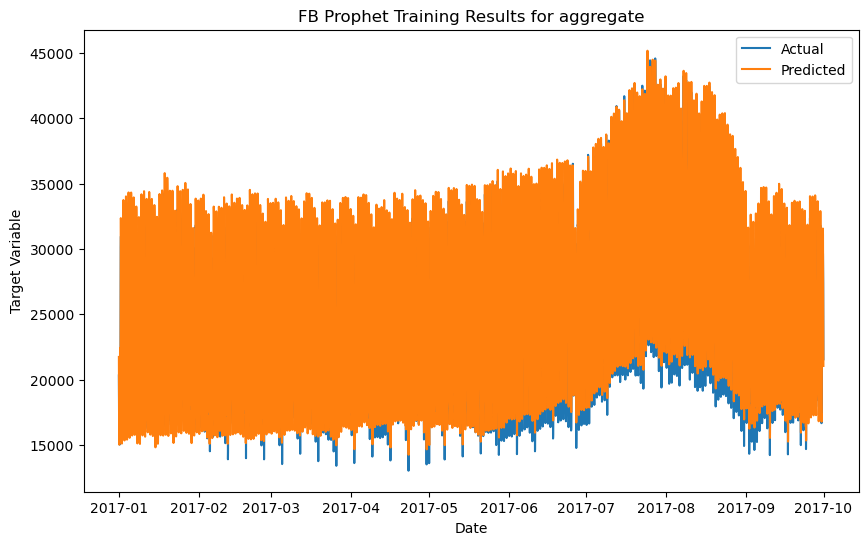

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(traindf_result['ds'], traindf_result['y'], label='Actual')
plt.plot(traindf_result['ds'], traindf_result['yhat'], label='Predicted')
plt.title('FB Prophet Training Results for ' + target_)
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()